# Artificial Neural Networks (ANNs) 

- ANNs is inspired by  the networks of bilogical neurons found in human brains. 
- ANNs are at the very core of Deep Learning.
- ANNs are versatile, powerfull, and scalable. 
- ANNs frequently outperform other ML techniques on very large and complex problems.

## Biological Neurons
- Biological neuron is an unusual-looking cell mostly found in anamial brains. 
- Composed of a cell body conatining the necleus and most of the cell's complex componentsy, many branching extensions called denfrites, plus one very long extension called axon.
- This individual biological neurons behave in such a way that they organize in a vast network of billions, with each neuron typically connected to thousands of other neurons. Highly complex computations can be performed by a network of fairly simple neurons, much like a complex anthill can emerge from the combined efforts of simple ants

<img src="images/Biological Neurons.png" style="width: 500px;">


### Logical Computations with Neurons

It has one or more binary (on/off) inpus and one binary output. The artidicial neuron activates its output when more than a certain number of its inputs are active. 
<img src="images/ANNs performing simple logical computations.png" style="width: 400px;">
- The first network on the left is the identity function: if neuron A is activated, then neuron C gets activated as well (since it receives two input signals from neuron A); but if neuron A is off, then neuron C is off as well.
-  The second network performs a logical AND: neuron C is activated only when both neurons A and B are activated (a single input signal is not enough to activate neuron C).
- The third network performs a logical OR: neuron C gets activated if either neuron A or neuron B is activated (or both).
- Finally, if we suppose that an input connection can inhibit the neuron’s activity (which is the case with biological neurons), then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A is active and neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa.


In [1]:
import numpy as np
import sklearn
import tensorflow as tf
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(42)
Colors = ['#004165','#dc4200',  '#69be28', '#f0be00', '#0cc6de', '#bed600', '#006983', '2b580c', '639a67']

Project_Root_Directory = "."
Section_Id             = "ANN"
Images_Path            = os.path.join(Project_Root_Directory, "images", Section_Id)
os.makedirs(Images_Path, exist_ok =True)

def save_pictures(fig_id, tight_layout =True, fig_extension ="png", resolution = 300):
    path = os.path.join(Images_Path, fig_id+ "."+ fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)
    

# Perceptrons

- Perceptron is one of the simplest ANN architectures.
- It is based on a slightly different artificial neuron called a threshold logic unit (TLU) or linear threshold unit (LTU). 
    - The inputs and output are numbers (instead of binary on/off values), and each input connection is associated with a weight. 
    - The TLU computs a weighted sum of its inpyt : $z = w_1x_1 + w_2x_2 + \dots + w_nx_n  = x^Tw$ , then applies a step function to that sum and outputs the rsult:

$$ h_w(x) = step (z),
$$
where $z= x^T w $.
- The most common step function used in Perceptrons is the Heaviside step function.
- A single TLU can be used for simple linear binary classification.
- Training a TLU in this case means finding the right values for w_0, w_1, and w_2. 
- A Perceptron is simply composed of a single layer of TLUs with each TLU connectedto all the inputs.
    - When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), the layer is called a fully connected layer, or a dense layer. 
    - The inputs of the Perceptron are fed to special passthrough neurons called input neurons: they output whatever input they are fed. All the input neurons form the input layer. 
    - Moreover, an extra bias feature is generally added (x0 = 1): it is typically represented using a special type of neuron called a bias neuron, which out‐puts 1 all the time.
- Computing the outputs of a fully connected layer:
$$ h_{W,b}(X) =  \phi(XW +b),
$$
    * X represents the matrix of input features,
    * W is weight matrix contains all the connection weight except fot the ones from the bias neuron. 
    * b is bias vector containing all the connection weights between the bias neuron and the artificial neurons. One bias term per artificial neuron.
    * $\phi$ is activation function. When the artificial neurons are TLUs, it is a step function. 

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron 
# Scikit-Learn provides a Perceptron class that implements a single-TLU network
# the Perceptron learning algorithm strongly resembles Stochastic Gradient Descent
# Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: 
# loss="perceptron",
# learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

iris =load_iris()
X    = iris.data[:, (2,3)]  # Extract petal length and petal width data
y    = (iris.target ==0).astype(np.int)

per_classification  = Perceptron(max_iter =1000, tol = 1e-3, random_state =42)
per_classification.fit(X,y)

y_pred = per_classification.predict([[2, 0.5]])
print(y_pred)

coefs     = -per_classification.coef_[0][0] / per_classification.coef_[0][1]
intercept = -per_classification.intercept_ / per_classification.coef_[0][1]

axes = [0,5,0,2]

x0,x1  =  np.meshgrid(  np.linspace(axes[0], axes[1], 500).reshape(-1,1),
                        np.linspace(axes[0],axes[1], 500).reshape(-1,1), )

X_new  = np.c_[x0.ravel(), x1.ravel()]
y_pred = per_classification.predict(X_new)
z      = y_pred.reshape(x0.shape)

[1]


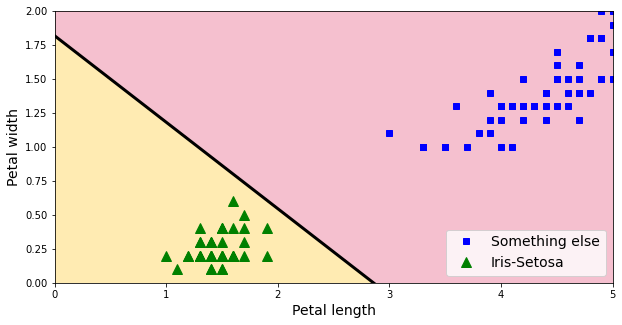

In [3]:
# plotting
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap([ "#DE3163",  "#FFBF00"   ])

plt.figure(figsize =(10,5))
plt.plot(X[y==0, 0], X[y == 0,1], "bs", label = "Something else")
plt.plot(X[y==1, 0], X[y == 1,1], "g^", label = "Iris-Setosa", markersize=10)

plt.plot([axes[0], axes[1]], [coefs * axes[0] + intercept, coefs * axes[1] + intercept], "k-", linewidth=3) #line y= ax+b

plt.contourf(x0, x1, z, cmap=custom_cmap, alpha =.3)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

#  Activating functions

In [4]:
def sigmoid(x):
    return 1 / (1+ np.exp(-x))

def relu(z):
    return np.maximum(0,x)

def derivative(f, x, eps = 1e-6):
    return (f(x + eps) - f(x - eps))/(2 * eps)

def heaviside(x):
    return (x >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

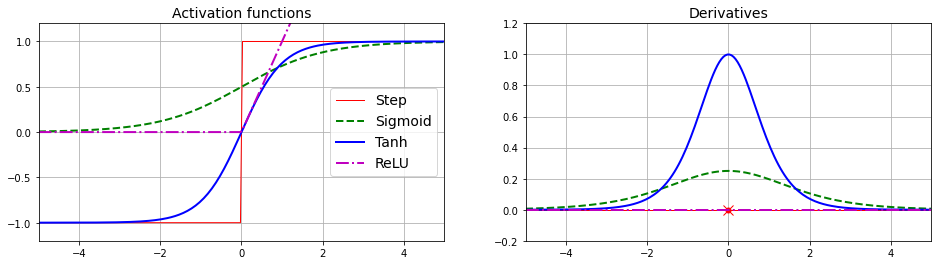

In [5]:
x = np.linspace(-5, 5, 200)

plt.figure(figsize=(16,4))

plt.subplot(121)
plt.plot(x, np.sign(x), "r-", linewidth=1, label="Step")
plt.plot(x, sigmoid(x), "g--", linewidth=2, label="Sigmoid")
plt.plot(x, np.tanh(x), "b-", linewidth=2, label="Tanh")
plt.plot(x, relu(x), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(x, derivative(np.sign, x), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(x, derivative(sigmoid, x), "g--", linewidth=2, label="Sigmoid")
plt.plot(x, derivative(np.tanh, x), "b-", linewidth=2, label="Tanh")
plt.plot(x, derivative(relu, x), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

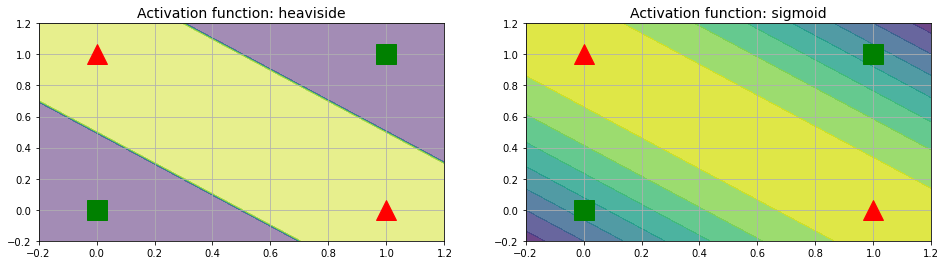

In [6]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(16,4))

plt.subplot(121)
plt.contourf(x1, x2, z1, alpha =.5)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "r^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2, alpha=.8)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "r^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Image Classifier by Keras

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
fashion_mnist = keras.datasets.fashion_mnist  # Using Keras to load the dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() 

In [9]:
X_train_full.shape # every image is represented as a 28 × 28 array

(60000, 28, 28)

In [10]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

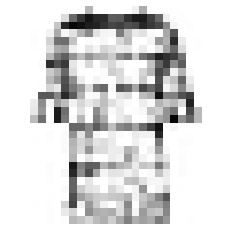

In [11]:
plt.imshow(X_train[10], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

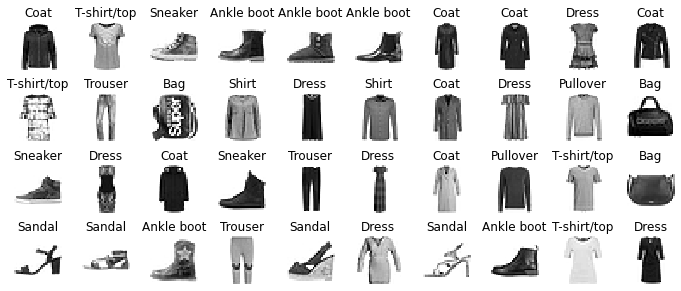

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [14]:
# Here is a classification MLP with two hidden layers
model = keras.models.Sequential()  # creates a Sequential model. 
# This is the simpest kind of Keras model for NN that are just composed of a single stack of layers connected sequentually.
# This is called Sequential API
model.add(keras.layers.Flatten(input_shape=[28, 28])) # the first layer whose role is to convert each input image into a 1D array
# it computes X.reshape(-1,1)
model.add(keras.layers.Dense(300, activation="relu")) # Dense hidden layer with 300 neurons. 
# It uses It will use the ReLU activation function. 
# Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs
model.add(keras.layers.Dense(100, activation="relu")) # Second Dense hidden layer with 100 neurons, also using the ReLU activation function
model.add(keras.layers.Dense(10, activation="softmax")) # Dense output layer with 10 neurons (one per class),
# using the softmax activation function (because the classes are exclusive)

In [15]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.layers

In [18]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


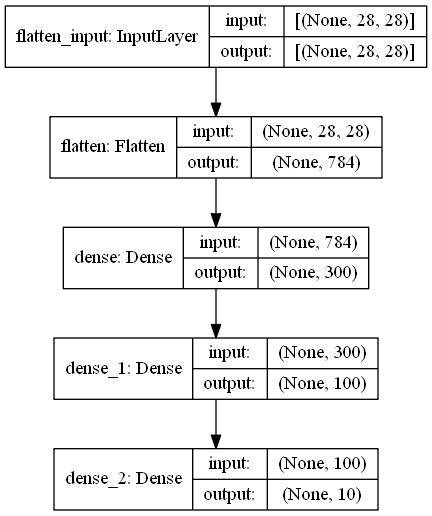

In [19]:
keras.utils.plot_model(model, "fashion_mnist_model.png", show_shapes=True)

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0187 - accuracy: 0.6807 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5028 - accuracy: 0.8260 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4485 - accuracy: 0.8423 - val_loss: 0.5341 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4211 - accuracy: 0.8529 - val_loss: 0.3915 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4062 - accuracy: 0.8580 - val_loss: 0.3748 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3756 - accuracy: 0.8671 - val_loss: 0.3707 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3655 - accuracy: 0.8709 - val_loss: 0.3623 - val_accuracy:

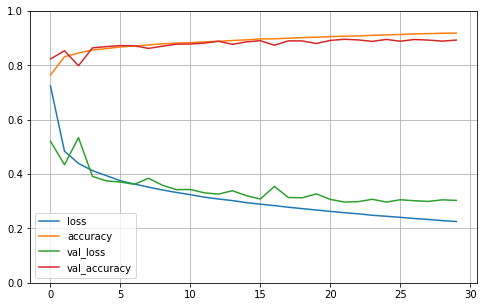

In [22]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8827


[0.33773481845855713, 0.8827000260353088]

TypeError: Invalid shape (2,) for image data

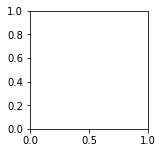

In [24]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Regression MLP

# Classification MLPs